### Student Information
Name: 黃邦晏

Student ID: 111033631

GitHub ID: yen111033631

Kaggle name: yen111033631

Kaggle team name: yen

Kaggle private scoreboard snapshot:

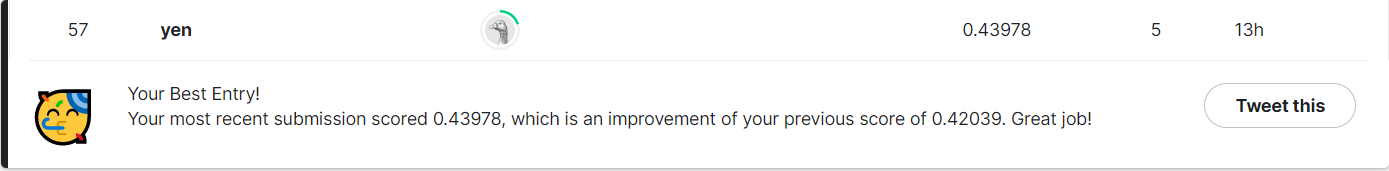

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.   
https://github.com/yen111033631/DM2022-Lab2-Homework/blob/main/Lab2_Homework_kaggle.ipynb


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print(train_df.head())
print(test_df.head())

         id                                               text emotion  \
175   10175  Forgot to eat dinner and now I'm furious with ...   anger   
1872  21015  #nana 4 hoco bc my dream since freshman year a...    fear   
749   10749  I'm just doing what u should b doing just mind...   anger   
10    10010  im so mad about power rangers. im incensed. im...   anger   
2054  30050  Thank you @twitter for the balloons today. #sm...     joy   

      intensity  
175       0.646  
1872      0.250  
749       0.312  
10        0.667  
2054      0.833  
        id                                               text  emotion  \
300  40813  This shit hurting my heart 😪 that's how seriou...  sadness   
340  40853  @xOffWithMyHeadx They've officially said all t...  sadness   
219  30848  Ready for that nice, breezy, calm, sunshine we...      joy   
240  30869  Chris would take full responsibility and would...      joy   
222  30851  Heather that was #hilarious! @MsHeatherBates @...      joy   

  

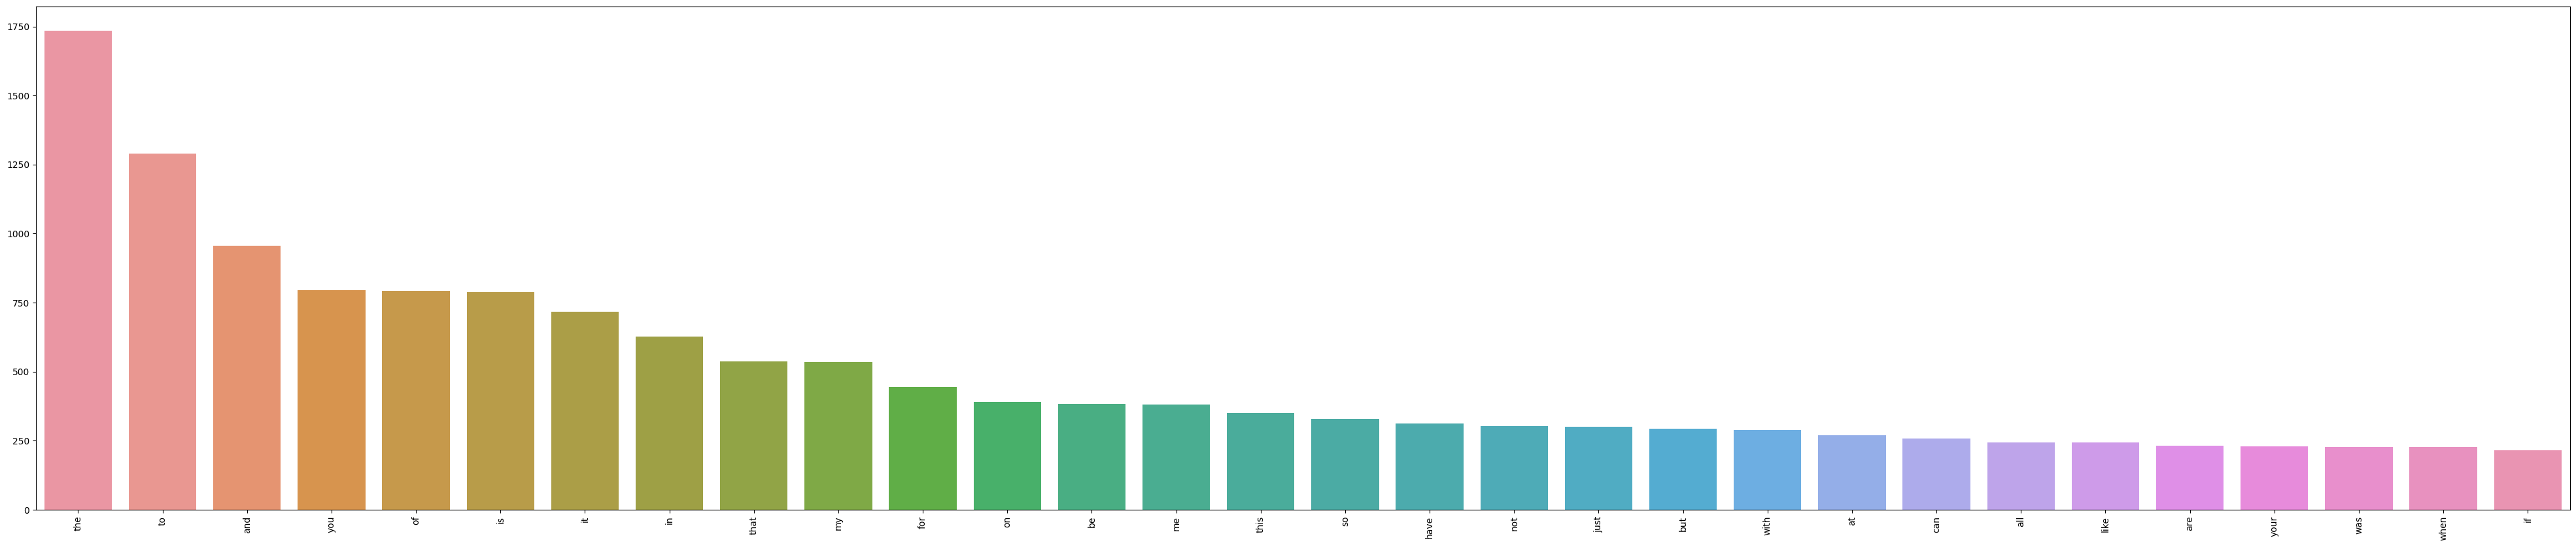

In [5]:
### train dataset ###
count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(train_df.text)
term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
B=np.argsort(-term_frequencies)

A=term_frequencies[B]

plt.subplots(figsize=(50, 10))
num = 30
g = sns.barplot(x=count_vect.get_feature_names_out()[B[0:num]], y=A[0:num])
g.set_xticklabels(count_vect.get_feature_names_out()[B[0:num]], rotation = 90);


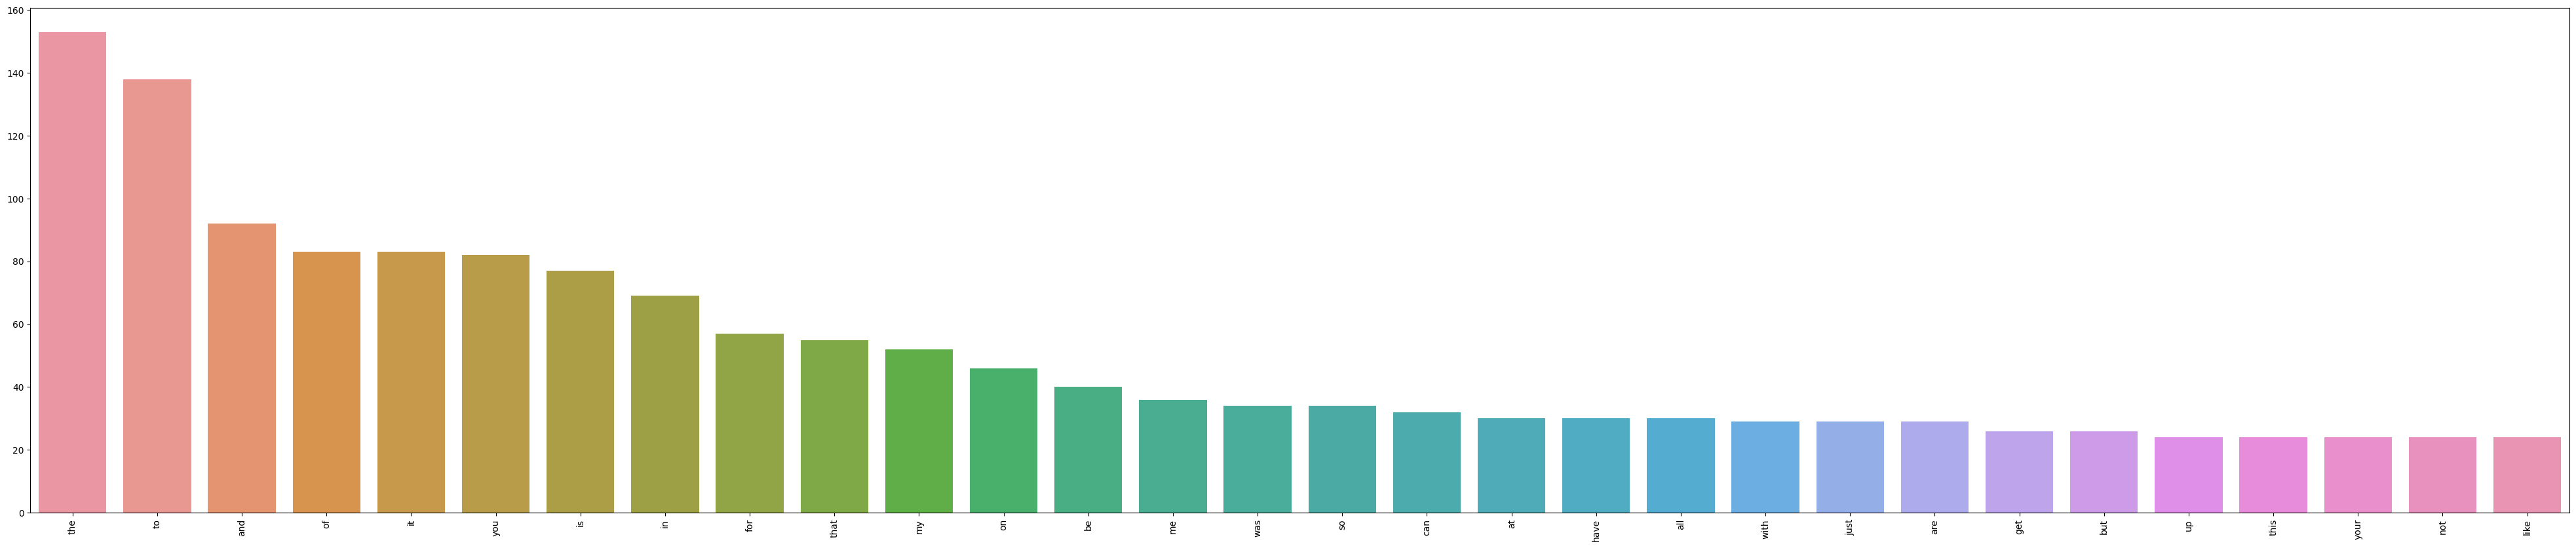

In [6]:
### test dataset ###
count_vect = CountVectorizer()
test_df_counts = count_vect.fit_transform(test_df.text)
term_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]
B=np.argsort(-term_frequencies)

A=term_frequencies[B]

plt.subplots(figsize=(50, 10))
num = 30
g = sns.barplot(x=count_vect.get_feature_names_out()[B[0:num]], y=A[0:num])
g.set_xticklabels(count_vect.get_feature_names_out()[B[0:num]], rotation = 90);


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf = tfidf_vectorizer.fit_transform(train_df['text'])

tfidf_vectorizer.get_feature_names()[100:110]

/home/neaf2070/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

training accuracy: 0.99  
testing accuracy: 0.66

                  precision    recall  f1-score   support
 
           anger       0.63      0.65      0.64        84
            fear       0.66      0.69      0.68       110
             joy       0.70      0.68      0.69        79
         sadness       0.65      0.59      0.62        74

        accuracy                           0.66       347
       macro avg       0.66      0.66      0.66       347
    weighted avg       0.66      0.66      0.66       347



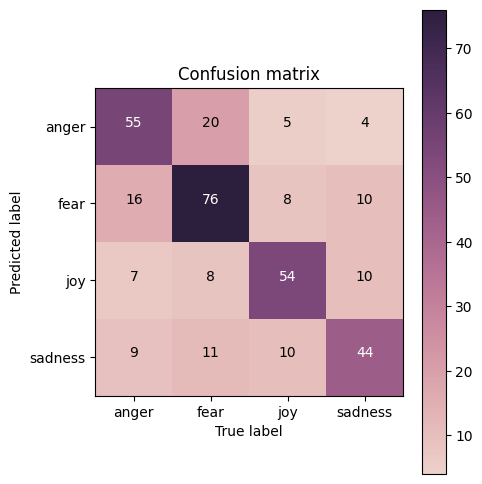

#### Answer here
The confution matrix above shows the prediction distribution of the predicted results, comparing with the true labels

From the confution matrix, we can clearly see how many wrong predictions were made for each class, and what classes these wrong predicitons are predicted as.

EX: The darkest ones from the top-right to the bottom-left (55, 76, 54, 44) are the numbers of correct predicitons.
EX: 20/115 of the wrong predictions in 'fear' class is predicted as 'anger'


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

## Model

In [8]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


In [9]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

/home/neaf2070/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
## build MultinomialNB model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'joy', 'sadness', 'joy', 'fear', 'sadness',
       'fear', 'anger', 'fear'], dtype='<U7')

---
## Results Evaluation

Now we will check the results of our model's performance

In [11]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.7


In [12]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [14]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

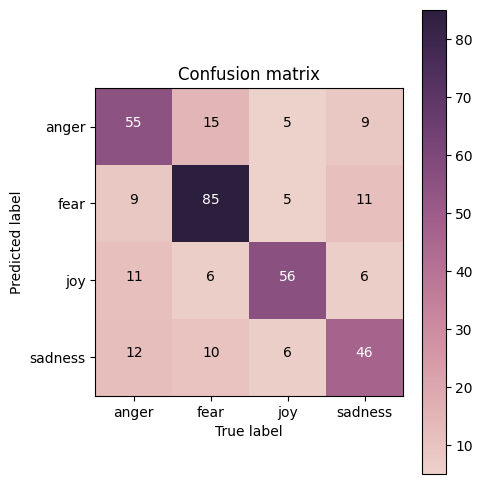

In [15]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
Naive Bayes: 
Training accuracy: 0.79, testing accuracy: 0.7 

Decision Tree: 
Training accuracy: 0.99, testing accuracy: 0.66 

From the accuracy, we notice that however the decision tree has a way higher training accuracy, but has a lower testing accuracy, it's probably because of an over-fitting issue, which is a disadvantage of Decision Tree that may commonly occur. 

From the recall or the confusion matrix, we can also find out that when using NB, misprediction are a lot less when the true label is fear and joy. 

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [16]:
# Answer here


### 6.1 Prepare data (X, y)

In [17]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

2022-11-27 18:30:20.970554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 18:30:21.533511: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64:
2022-11-27 18:30:21.533581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64:
2022-11-27 18:30:21.533587: W tensorflow/compiler/tf2tensorrt/utils/py_uti

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [18]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 175     anger
1872     fear
749     anger
10      anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


/tmp/ipykernel_1761950/393062722.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


### 6.3 Build model

In [19]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [20]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-11-27 18:30:22.765583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 18:30:22.794033: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64:
2022-11-27 18:30:22.794060: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-27 18:30:22.794461: I tensorflow/core/platform/cpu_feature_guard.cc:193] This Tensor

### 6.4 Train

In [21]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 2ms/step - loss: 1.3270 - accuracy: 0.3670 - val_loss: 1.2843 - val_accuracy: 0.4294
Epoch 2/25
113/113 [==============================] - 0s 940us/step - loss: 0.9832 - accuracy: 0.6507 - val_loss: 0.9346 - val_accuracy: 0.6484
Epoch 3/25
113/113 [==============================] - 0s 949us/step - loss: 0.5980 - accuracy: 0.7847 - val_loss: 0.8208 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 951us/step - loss: 0.4217 - accuracy: 0.8461 - val_loss: 0.8187 - val_accuracy: 0.7032
Epoch 5/25
113/113 [==============================] - 0s 941us/step - loss: 0.3329 - accuracy: 0.8782 - val_loss: 0.8368 - val_accuracy: 0.6715
Epoch 6/25
113/113 [==============================] - 0s 940us/step - loss: 0.2759 - accuracy: 0.9040 - val_loss: 0.8741 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 966us/step - loss: 0.2300 - accuracy: 0.9258 - val_loss: 0.9150 - val_accuracy: 0

### 6.5 Predict on testing data

In [22]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 1ms/step


array([[1.4908433e-05, 5.6426146e-04, 1.3114387e-04, 9.9928975e-01],
       [6.5167907e-05, 2.7177416e-04, 2.8159934e-06, 9.9966025e-01],
       [2.2320304e-02, 2.6257494e-01, 7.1157843e-01, 3.5262890e-03],
       [6.4729538e-05, 4.0598255e-01, 6.8664012e-05, 5.9388405e-01],
       [3.5326406e-07, 1.7250961e-04, 9.9982691e-01, 3.6453943e-07]],
      dtype=float32)

In [23]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'joy', 'sadness', 'joy'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [25]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log[:5]

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367008,1.326993,0.429395,1.284333
1,1,0.650706,0.983228,0.648415,0.934609
2,2,0.784666,0.597980,0.694524,0.820776
3,3,0.846111,0.421725,0.703170,0.818665
4,4,0.878218,0.332907,0.671470,0.836845


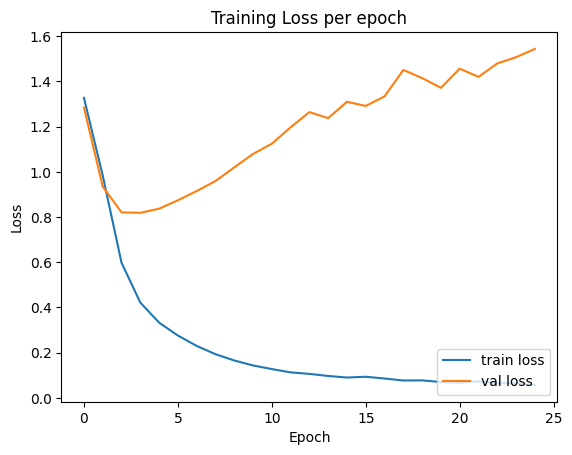

In [26]:
lines = training_log.plot.line(x='epoch', y=['loss', 'val_loss'])
plt.title('Training Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'val loss'], loc='lower right')
plt.show()

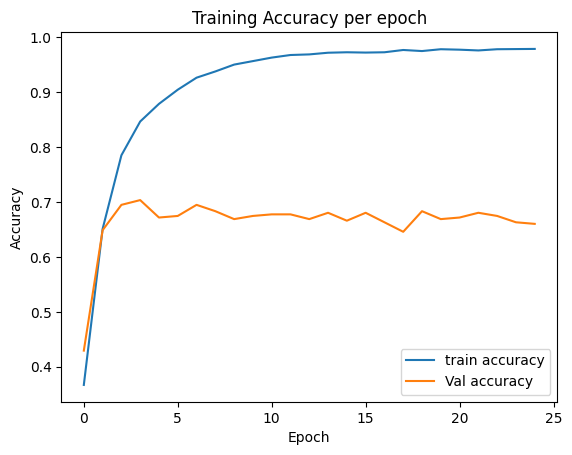

In [27]:
lines = training_log.plot.line(x='epoch', y=['accuracy', 'val_accuracy'])
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

#### Answer here
From the two figures above, we can see that after about the 3rd epoch, validation accuracy starts to slowly decrease, and the validation loss starts to grow. This is a sign of over-fitting.
Therefore, if an implementaion is required, the loss and accuracy turning point, which is the 3rd epoch would be my choice for the the best performance.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model? 

Answer here:   
Assign an index for each word in the word vectors, to generate a embedding matrix.  
Tokenize our input data, which turns sequences of words into sequences of tokens.  
Then, assign index of each token corresponding to the embedding matrix.  
If the token cannot be matched, then assign index = 0.(which its embedding matrix is all zeros)  
Each sequence of words (sentence) can then be translated to a 2D array, which the word vector of each token
is stored within.  


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [28]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

# w2v_google_model.most_similar('happy', topn=10)

load ok


In [29]:
word_list = ['angry','happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)] 
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('\ntarget words: ')
print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


target words: 
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', '

/home/neaf2070/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/neaf2070/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


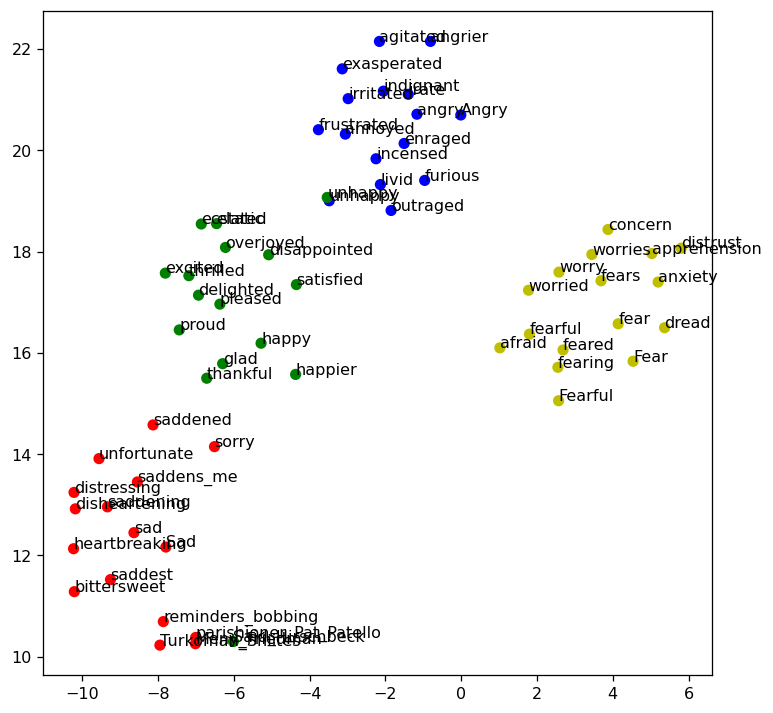

In [30]:
from sklearn.manifold import TSNE
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = model.index_to_key
# all_word = model.index2word
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()